<a href="https://colab.research.google.com/github/koshal123/M.Tech-Project/blob/master/erosion_steel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Tensorflow framework

In [2]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from sklearn.model_selection import train_test_split

print('Using Keras version:', __version__, 'backend:', K.backend())
assert(LV(__version__) >= LV("2.0.0"))

Using TensorFlow backend.


Using Keras version: 2.2.5 backend: tensorflow


In [3]:
if K.backend() == "tensorflow":
    import tensorflow as tf
    device_name = tf.test.gpu_device_name()
    if device_name == '':
        device_name = "None"
    print('Using TensorFlow version:', tf.__version__, ', GPU:', device_name)

Using TensorFlow version: 1.14.0 , GPU: /device:GPU:0


In [0]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving steel_original.csv to steel_original.csv


In [0]:
dataset=pd.read_csv('steel_original.csv',header=0,encoding = 'unicode_escape')

In [7]:
dataset.head()

,A,B,C,erosion rate,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,550,70,60,10.151,NaN,NaN,NaN,NaN,NaN
1,550,70,60,10.158,NaN,NaN,NaN,NaN,NaN
2,750,70,60,15.463,NaN,NaN,NaN,NaN,NaN
3,450,85,45,10.395,NaN,NaN,NaN,NaN,NaN
4,550,70,30,11.269,NaN,NaN,NaN,NaN,NaN


In [0]:
d = dataset

In [0]:
#dependent and independent variables
X=d.iloc[:, 0:3].values
Y=d.iloc[:, 3].values

In [10]:
Y

array([10.151, 10.158, 15.463, 10.395, 11.269, 12.539,  7.936, 10.148,
       18.095, 14.503,  9.523,  8.573,  6.14 , 10.143, 10.156,  5.654,
       10.139,  8.746, 14.601, 16.269])

In [11]:
Y.shape

(20,)

In [12]:
X

array([[550,  70,  60],
       [550,  70,  60],
       [750,  70,  60],
       [450,  85,  45],
       [550,  70,  30],
       [650,  55,  75],
       [350,  70,  60],
       [550,  70,  60],
       [550, 100,  60],
       [650,  85,  75],
       [550,  40,  60],
       [550,  70,  90],
       [450,  55,  45],
       [550,  70,  60],
       [550,  70,  60],
       [450,  55,  75],
       [550,  70,  60],
       [450,  85,  75],
       [650,  55,  45],
       [650,  85,  45]])

In [0]:
#Cross validation by test and training data set
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train , Y_test  = train_test_split(X,Y, test_size=0.00005, random_state=0)

**We are scaling only the independend variables, it is not important to scale dependent variable too**

In [0]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc  =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train.shape

(19, 3)

In [17]:
X_train

array([[ 0.05933908, -0.05933908, -0.05933908],
       [ 1.18678166,  1.06810349, -1.18678166],
       [ 0.05933908,  2.19554607, -0.05933908],
       [ 0.05933908, -2.31422423, -0.05933908],
       [-1.06810349,  1.06810349,  1.06810349],
       [-2.19554607, -0.05933908, -0.05933908],
       [ 0.05933908, -0.05933908, -0.05933908],
       [ 0.05933908, -0.05933908, -2.31422423],
       [ 2.31422423, -0.05933908, -0.05933908],
       [ 1.18678166, -1.18678166,  1.06810349],
       [ 0.05933908, -0.05933908, -0.05933908],
       [ 1.18678166,  1.06810349,  1.06810349],
       [ 0.05933908, -0.05933908, -0.05933908],
       [ 0.05933908, -0.05933908, -0.05933908],
       [ 0.05933908, -0.05933908,  2.19554607],
       [-1.06810349,  1.06810349, -1.18678166],
       [ 0.05933908, -0.05933908, -0.05933908],
       [-1.06810349, -1.18678166,  1.06810349],
       [-1.06810349, -1.18678166, -1.18678166]])

In [18]:
Y_train.shape

(19,)

In [19]:
X_test.shape

(1, 3)

In [20]:
Y_test.shape

(1,)

#Start to make artificial neural network

In [0]:
#Initializing the ANN
model=Sequential()

In [0]:
#Adding input layer and first hidden layer
#input neuron=4 , hidden neuron=9
model.add(Dense(5,input_dim=3,activation='relu'))

In [0]:
#Adding the output layer
model.add(Dense(1, activation="linear"))

In [151]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 5)                 20        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 6         
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile the ANN
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [0]:
#Fitting the ANN in training set
#estimator=model.fit(X_train,Y_train,validation_split=0.1 , batch_size=4, epochs=400, verbose=1 )  #with validation_split
estimator=model.fit(X_train, Y_train , batch_size=1, epochs=800, verbose=0 ) #Without validation_split

#Using testing data for prediction

In [154]:
y_pred = model.predict(X_test)
print(y_pred)

[[12.914118]]


#Experimental Value

In [155]:
print(Y_test)

[14.601]


In [0]:
#Scatter plot of y_pred vs Y-test
# plt.scatter(y_pred, Y_test)
# plt.show()

**Using External to Predict the output**

In [158]:
from google.colab import files
uploaded = files.upload()

Saving steel_original.csv to steel_original (4).csv


In [0]:
dataset_1=pd.read_csv('steel_original.csv',header=0,encoding = 'unicode_escape')

In [0]:
Z=dataset_1.iloc[:, 0:3].values

In [161]:
Z

array([[550,  70,  60],
       [550,  70,  60],
       [750,  70,  60],
       [450,  85,  45],
       [550,  70,  30],
       [650,  55,  75],
       [350,  70,  60],
       [550,  70,  60],
       [550, 100,  60],
       [650,  85,  75],
       [550,  40,  60],
       [550,  70,  90],
       [450,  55,  45],
       [550,  70,  60],
       [550,  70,  60],
       [450,  55,  75],
       [550,  70,  60],
       [450,  85,  75],
       [650,  55,  45],
       [650,  85,  45]])

In [0]:
 Z_new = sc.transform(Z)

In [163]:
Z_new=model.predict(Z_new)
Z_new

array([[ 9.998264 ],
       [ 9.998264 ],
       [16.55673  ],
       [11.067493 ],
       [11.415764 ],
       [11.733685 ],
       [ 7.3475585],
       [ 9.998264 ],
       [16.97557  ],
       [14.742053 ],
       [ 9.684627 ],
       [ 8.580764 ],
       [ 6.0873322],
       [ 9.998264 ],
       [ 9.998264 ],
       [ 6.2731805],
       [ 9.998264 ],
       [ 9.983105 ],
       [12.914118 ],
       [16.159552 ]], dtype=float32)

In [164]:
Z_new.shape

(20, 1)

In [165]:
Y_old=dataset_1.iloc[:, 3].values
Y_old

array([10.151, 10.158, 15.463, 10.395, 11.269, 12.539,  7.936, 10.148,
       18.095, 14.503,  9.523,  8.573,  6.14 , 10.143, 10.156,  5.654,
       10.139,  8.746, 14.601, 16.269])

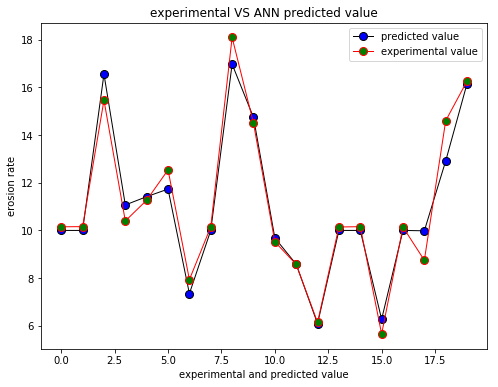

In [166]:
plt.figure(figsize=(8, 6))
plt.plot(Z_new, color='black',linewidth = 1, marker='o', markerfacecolor='blue', markersize=8, label='predicted value')
plt.plot(Y_old, color='red',linewidth = 1, marker='o', markerfacecolor='green', markersize=8, label='experimental value')
plt.xlabel('experimental and predicted value')
plt.ylabel('erosion rate')
plt.title('experimental VS ANN predicted value')
plt.legend()
plt.show()

In [0]:
A= np.array([[350, 55, 90]])

In [0]:
A = sc.transform(A)

In [169]:
A=model.predict(A)
A

array([[6.2081857]], dtype=float32)